In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 1. CONFIGURATION & DATA LOADING
CSV_PATH = '/kaggle/input/rsna-bone-age/boneage-training-dataset.csv'
IMG_DIR = '/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset'

print("Loading Dataset...")
df = pd.read_csv(CSV_PATH)
df['path'] = df['id'].apply(lambda x: os.path.join(IMG_DIR, f"{x}.png"))
df['gender_str'] = df['male'].apply(lambda x: 'Male' if x else 'Female')

# Define Developmental Stages (Classes)
def get_stage(months):
    if months < 36: return 'Toddler (0-3y)'
    elif months < 120: return 'Pre-Puberty (3-10y)'
    elif months < 180: return 'Puberty (10-15y)'
    else: return 'Young Adult (15y+)'

df['category'] = df['boneage'].apply(get_stage)

# Define Order for plotting
stage_order = ['Toddler (0-3y)', 'Pre-Puberty (3-10y)', 'Puberty (10-15y)', 'Young Adult (15y+)']

Loading Dataset...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

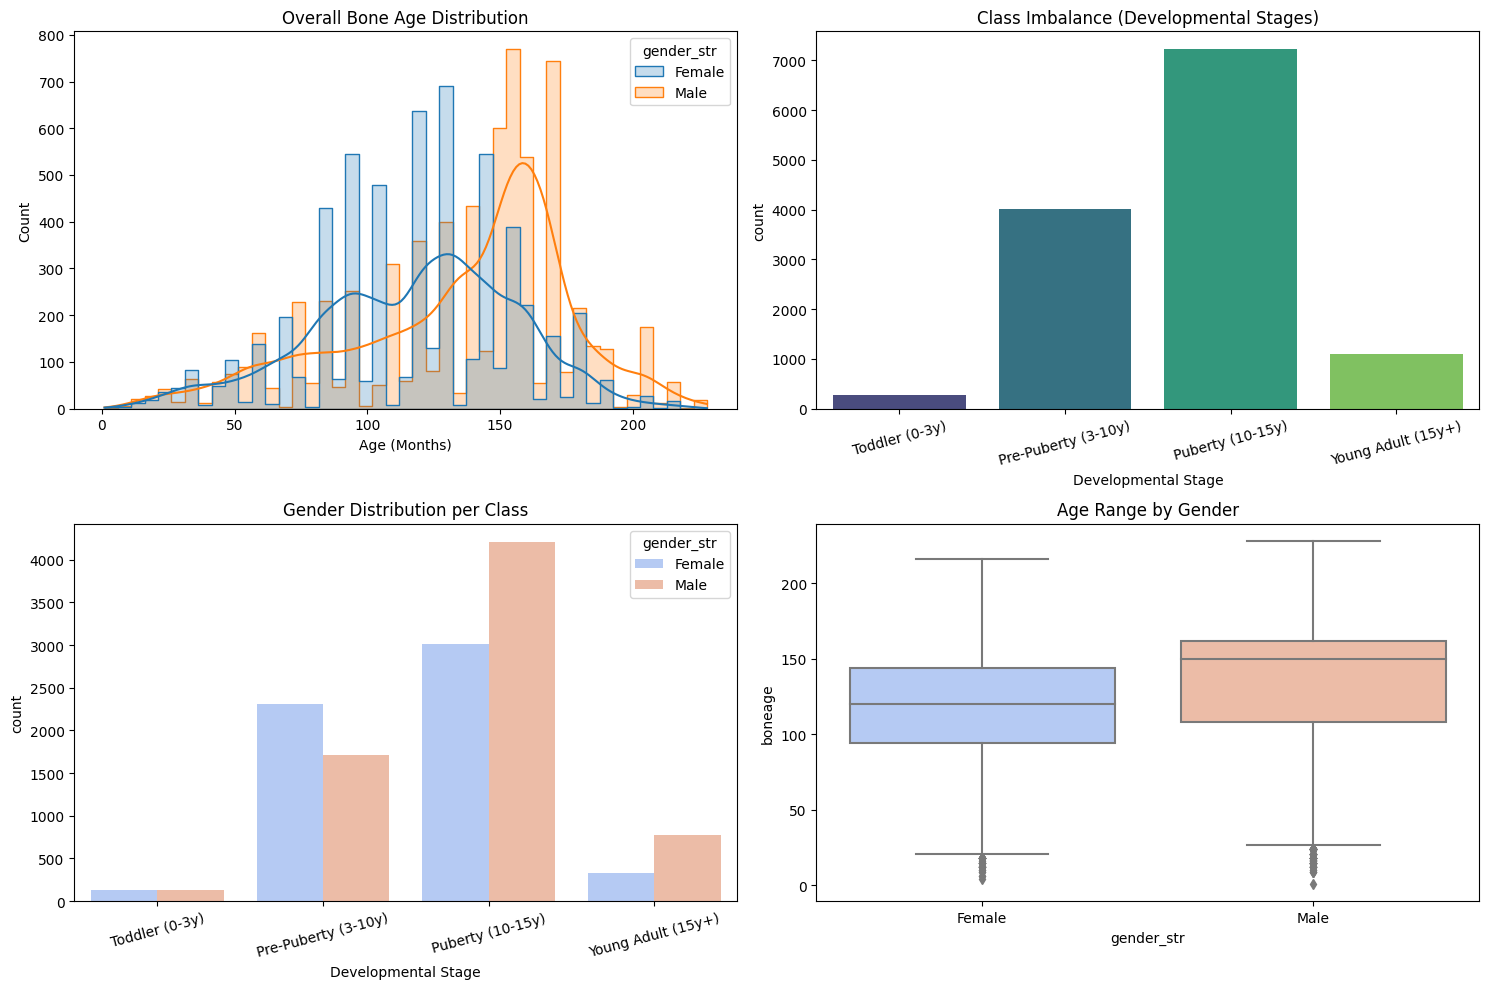


=== CLASS DISTRIBUTION ===
category
Puberty (10-15y)       57.283324
Pre-Puberty (3-10y)    31.892792
Young Adult (15y+)      8.714614
Toddler (0-3y)          2.109270
Name: proportion, dtype: float64

=== GENDER DISTRIBUTION ===
gender_str
Male      54.182856
Female    45.817144
Name: proportion, dtype: float64


In [10]:
# 2. CLASS IMBALANCE VISUALIZATION

plt.figure(figsize=(15, 10))

# Plot A: Overall Age Distribution (Histogram)
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='boneage', kde=True, hue='gender_str', element="step")
plt.title("Overall Bone Age Distribution")
plt.xlabel("Age (Months)")

# Plot B: Class Imbalance (Bar Chart)
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='category', order=stage_order, palette='viridis')
plt.title("Class Imbalance (Developmental Stages)")
plt.xticks(rotation=15)
plt.xlabel("Developmental Stage")

# Plot C: Gender Imbalance per Class
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='category', hue='gender_str', order=stage_order, palette='coolwarm')
plt.title("Gender Distribution per Class")
plt.xticks(rotation=15)
plt.xlabel("Developmental Stage")

# Plot D: Boxplot of Age vs Gender
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='gender_str', y='boneage', palette='coolwarm')
plt.title("Age Range by Gender")

plt.tight_layout()
plt.show()

# Print Numerical Statistics
print("\n=== CLASS DISTRIBUTION ===")
print(df['category'].value_counts(normalize=True) * 100)

print("\n=== GENDER DISTRIBUTION ===")
print(df['gender_str'].value_counts(normalize=True) * 100)

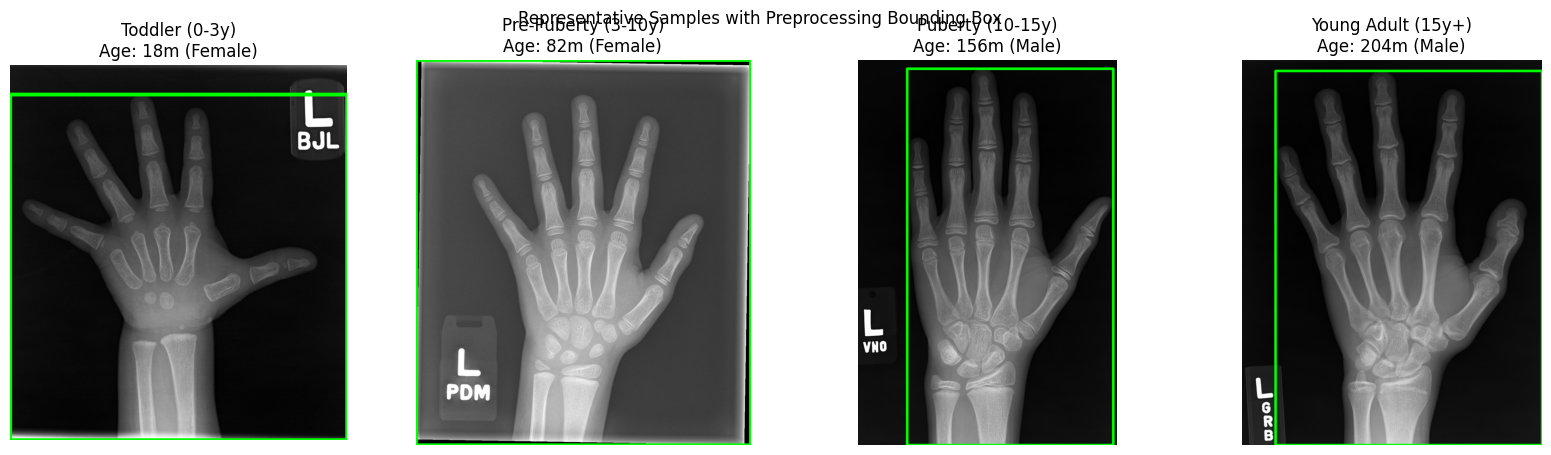

In [20]:
# 3. SAMPLE VISUALIZATION (Data Preprocessing Check)

def visualize_samples_by_class(df, num_samples=1):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    for i, stage in enumerate(stage_order):
        # Sample an image from this stage
        sample = df[df['category'] == stage].sample(1).iloc[0]
        
        img = cv2.imread(sample['path'], cv2.IMREAD_GRAYSCALE)
        
        # Visualize the "Smart Crop" preprocessing (Simulation)
        # Apply binary threshold
        _, thresh = cv2.threshold(img, 15, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            c = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(c)
            # Draw box on copy
            img_viz = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            cv2.rectangle(img_viz, (x, y), (x+w, y+h), (0, 255, 0), 10)
        else:
            img_viz = img
            
        axes[i].imshow(img_viz)
        axes[i].set_title(f"{stage}\nAge: {sample['boneage']}m ({sample['gender_str']})")
        axes[i].axis('off')
        
    plt.suptitle("Representative Samples with Preprocessing Bounding Box\n\n", fontsize=12)
    plt.show()

visualize_samples_by_class(df)